## Structure of an OpenSeesPy Model

#### An OpenSeesPy model follows a typical structure:

#### 1) Load libraries
#### 2) Create model, definition of nodes, masses, and kinematic constraints
#### 3) Definition of materials
#### 4) Definition of transformations and elements
#### 5) Definition of loads
#### 6) Model analysis
#### __________________________________________________________

#### 1) Loading libraries

In [1]:
from openseespy.opensees import *
# import openseespy.opensees as ops
import opsvis as opsv

#### 2) Create model, nodes and constraints

In [2]:
wipe()
model('basic', '-ndm', 2, '-ndf', 3)
node(1,0.0,0.0)
node(2,0.0,3.0)
fix(1,1,1,1)

<Axes: >

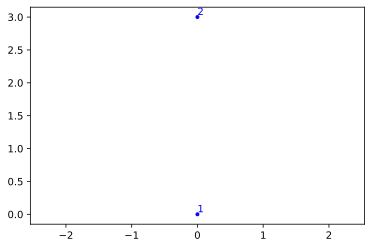

In [3]:
opsv.plot_model()

#### 3) Creating materials

In [4]:
E = 24000000
uniaxialMaterial('Elastic',1,E)

#### 4) Defining transformations and elements

<Axes: >

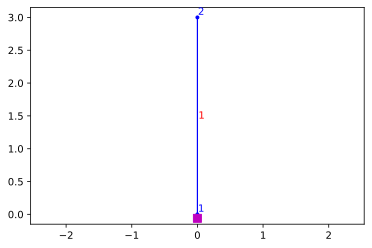

In [5]:
tlineal = 1
geomTransf('Linear', tlineal)

b = 0.3
h = 0.4
A = b*h
I = b*h**3/12

element('elasticBeamColumn',1,1,2,A,E,I,tlineal)
opsv.plot_model()

#### 5) Definition of loads

<Axes: >

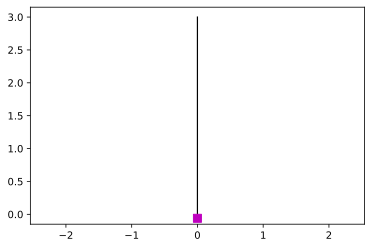

In [6]:
timeSeries('Linear', 1)
pattern('Plain',1,1)
load(2,10,0.0,0.0)
opsv.plot_loads_2d()

#### 6) Analysis

In [7]:
system('BandGeneral')
constraints('Plain')
numberer('RCM')
test('NormDispIncr', 1.0e-12, 10, 3)
algorithm('Newton')
integrator('LoadControl', 0.1)
analysis('Static')
ok = analyze(10)
if ok != 0:
    print('Gravity analysis failed')
else:
    print('Gravity analysis completed')

Gravity analysis completed


128.00000000000006

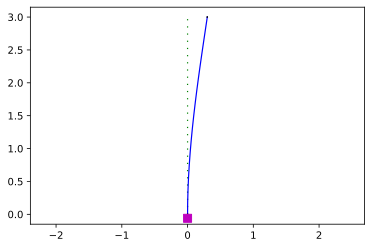

In [8]:
opsv.plot_defo()